In [83]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [84]:
# A Little Statistics
# 1. Probabilities on the normal distribution and values of sigma
# 1A. Sigma refers to the area under the normal distribution for x values greater than sigma
# For instance for x = 1 sigma, this refers to the area under the standard normal distribution for x > 1

# 1B. Find probabilities associated with sigma values
print("Area under curve from negative infinity to x=1: " + str(stats.norm.cdf(1)))
prob_1_sigma = 1 - stats.norm.cdf(1)
prob_2_sigma = 1 - stats.norm.cdf(2)
prob_5_sigma = 1 - stats.norm.cdf(5)
print("Probability associated with 1 sigma: " + str(prob_1_sigma))
print("Probability associated with 2 sigma: " + str(prob_2_sigma))
print("Probability associated with 5 sigma: " + str(prob_5_sigma))

Area under curve from negative infinity to x=1: 0.8413447460685429
Probability associated with 1 sigma: 0.15865525393145707
Probability associated with 2 sigma: 0.02275013194817921
Probability associated with 5 sigma: 2.866515719235352e-07


In [85]:
# 1C. Find value of sigma given the associated probability
print(stats.norm.ppf(prob_1_sigma))
print(stats.norm.ppf(prob_2_sigma))
print(stats.norm.ppf(prob_5_sigma))
print(stats.norm.ppf(stats.norm.cdf(-5)))
# small rounding errors appear when doing subtraction for small probabilities - for instance ppf(1-cdf(5)) is a little 
# different from ppf(cdf(-5))

# 1D. Negative values appear because sigma refers to the probability or area under the curve for x values greater than that
# sigma value, but the cdf function gives the area for x values less than the sigma value. These are the negative sigma values
# because the standard normal distribution is symmetric.

-1.0
-2.0000000000000004
-4.999999999970176
-5.000000000000001


In [86]:
# 2. Other continuous analytic distributions: Exponential
r = stats.expon.rvs(size=100000)

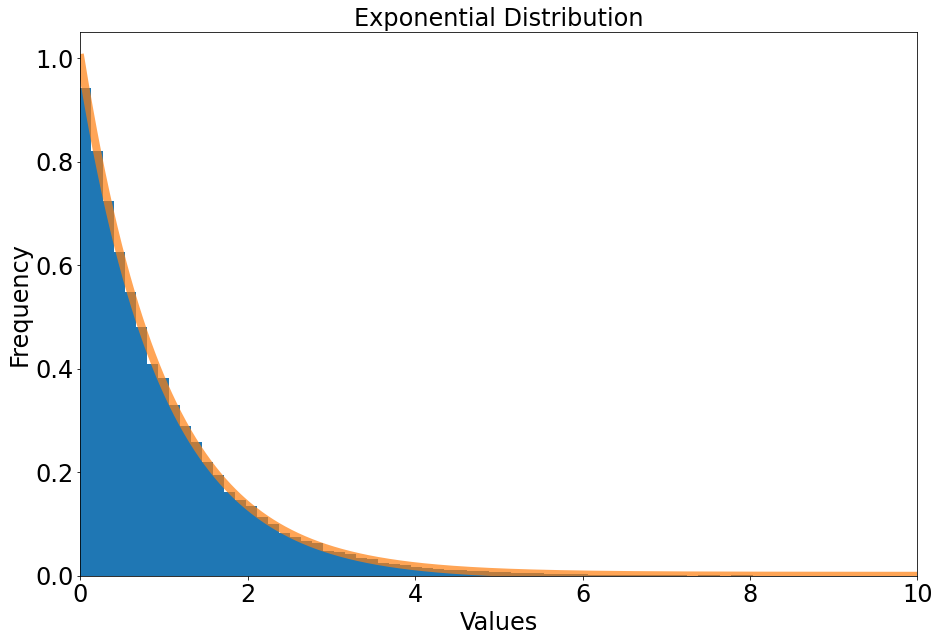

In [87]:
# plot of the exponential distribution
fig, ax = plt.subplots(1, 1)
ax.hist(r, 100, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,10])
x = np.linspace(0,10,1000)
ax.plot(x, stats.expon.pdf(x), linewidth = 8, alpha = 0.7)

plt.title("Exponential Distribution", fontsize=24)
plt.xlabel("Values", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.show()

# 

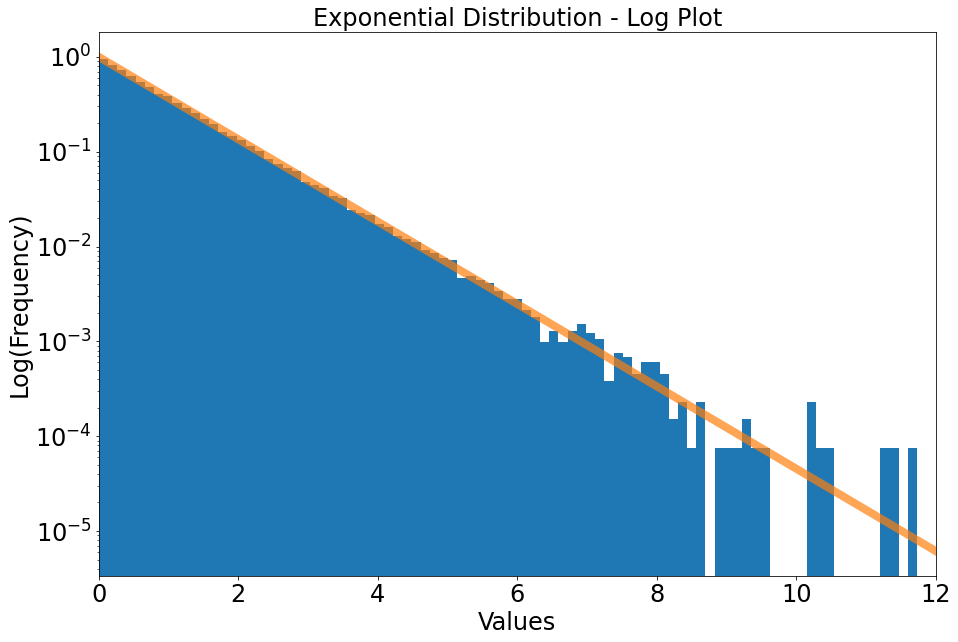

In [88]:
# 2. (continued) Log plot of the exponential distribution
fig, ax = plt.subplots(1, 1)
ax.hist(r, 100, density=True)
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlim([0, 12])
x = np.linspace(0,12,1000)
ax.plot(x, stats.expon.pdf(x), linewidth = 8, alpha = 0.7)

plt.title("Exponential Distribution - Log Plot", fontsize=24)
plt.xlabel("Values", fontsize=24)
plt.ylabel("Log(Frequency)", fontsize=24)
plt.show()

In [89]:
# 3. Statistical Question and Inference
# 3A. Chosen value:
x = 8

# 3B. Question: If there is no signal and the signal-free data has an exponential distribution, what is the probability that the
# data produces a signal that is equally or more signal-like than x=8?

# 3C. Mathematical Integral: The area under the e^-x curve from 8 to positive infinity.

# 3D. Probability that the background or signal-free data produced the signal:
prob = 1 - stats.expon.cdf(x)
print("3D. Probability that background can produce this signal or something more signal-like: "  + str(prob))

# 3E. Corresponding sigma value from the standard normal distribution:
sigma = stats.norm.ppf(prob)
print("3E. Corresponding sigma value: " + str(abs(sigma)))

3D. Probability that background can produce this signal or something more signal-like: 0.00033546262790251635
3E. Corresponding sigma value: 3.4011926561446617


In [90]:
# 4. Various hypothetical measurement values to see how the probabilities and 'sigmas' change and any patterns that appear.
# use values x=1 to x=10:
probs_sigmas = [((1 - stats.expon.cdf(x)), abs(stats.norm.ppf(1 - stats.expon.cdf(x)))) for x in range(1, 11)]
probs_frame = pd.DataFrame(probs_sigmas, columns=["Probability", "Sigma"])
probs_frame.index = range(1, 11)
print(probs_frame)

# Since I'm using the exponential distribution as the signal-free distribution, as x increases constantly, the probability
# - the area under the curve from x to positive infinity - decreases at a decreasing rate, which makes sense based 
# on the shape of the exponential curve. Lower probabilities correspond to higher values of sigma. Following this trend the 
# sigma increases quickly for changes in x at lower values of x but increases more slowly at higher values of x.

    Probability     Sigma
1      0.367879  0.337475
2      0.135335  1.101520
3      0.049787  1.646922
4      0.018316  2.089850
5      0.006738  2.470939
6      0.002479  2.809782
7      0.000912  3.117525
8      0.000335  3.401193
9      0.000123  3.665538
10     0.000045  3.913946


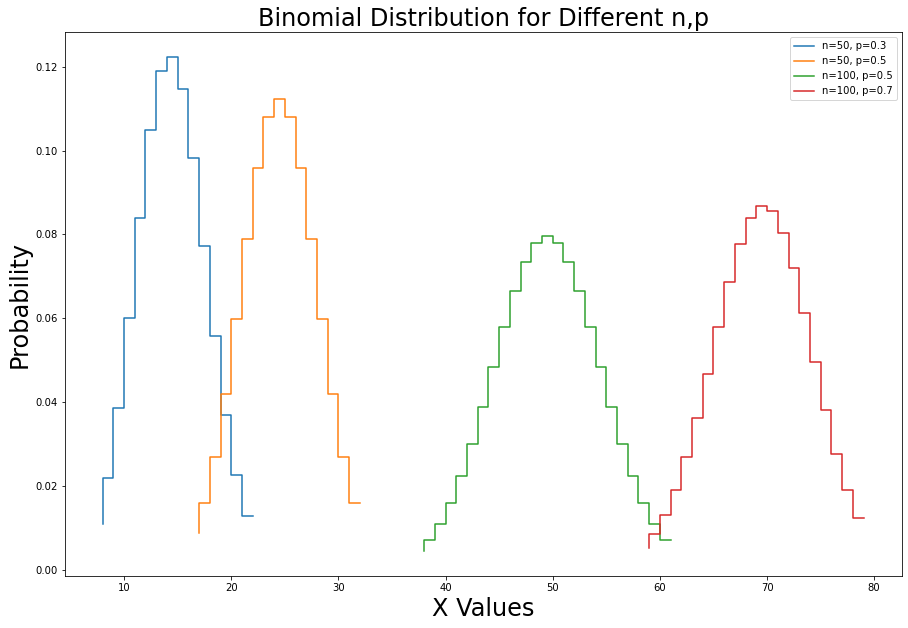

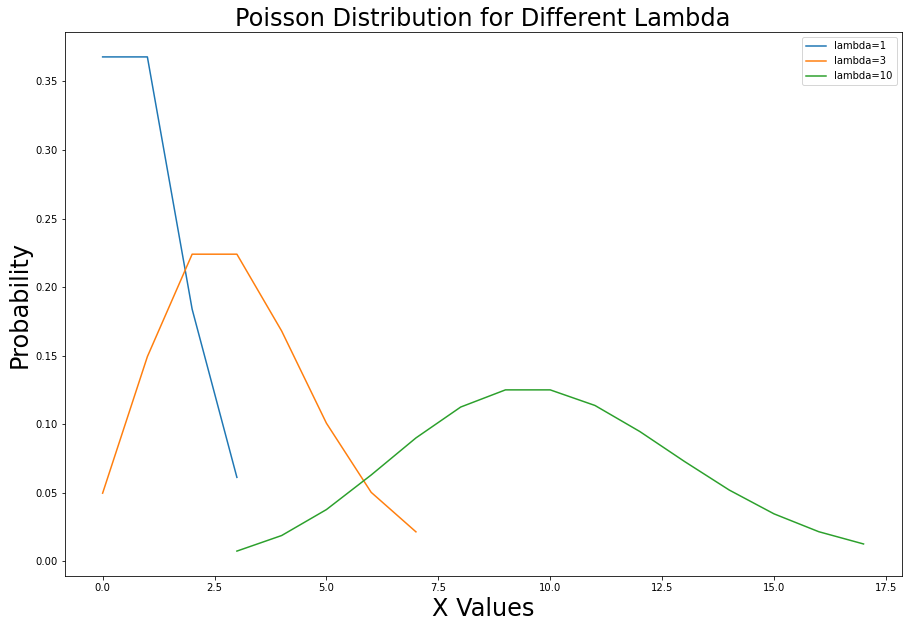

In [91]:
# Non-continuous Distributions: Binomial

# 1. Binomial
# 1A. Given the probability (p) of the success on an independent trial (ex. flipping a coin - p=0.5), and the number of trials
# in an experiment (n), and that the probability of success is the same for every trial, the binomial distribution can give
# the probability of x number of success happening during those n trials.

# 1B. Plots of Binomial with different parameters
fig, ax = plt.subplots(1, 1)
# different values of n
n = [50, 50, 100, 100]
# different values of p
p = [0.3, 0.5, 0.5, 0.7]
for i in range(4):
    x = np.arange(stats.binom.ppf(0.01, n[i], p[i]), stats.binom.ppf(0.99, n[i], p[i]))
    ax.step(x, stats.binom.pmf(x, n[i], p[i]), label="n="+str(n[i])+", p="+str(p[i]))

plt.title("Binomial Distribution for Different n,p", fontsize=24)
plt.xlabel("X Values", fontsize=24)
plt.ylabel("Probability", fontsize=24)
plt.legend()


# Poisson (for my reference):
# Given an average value over a certain time period, gives the probability that a certain value will occur during a future time 
# period.
# Example: 2 storms happen per year; can use Poisson distribution to find probability of 3 storms happening next year.
fig, ax = plt.subplots(1, 1)
mu = 1
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
ax.plot(x, stats.poisson.pmf(x, mu), label=("lambda="+str(mu)))
mu = 3
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
ax.plot(x, stats.poisson.pmf(x, mu), label=("lambda="+str(mu)))
mu = 10
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
ax.plot(x, stats.poisson.pmf(x, mu), label=("lambda="+str(mu)))

plt.title("Poisson Distribution for Different Lambda", fontsize=24)
plt.xlabel("X Values", fontsize=24)
plt.ylabel("Probability", fontsize=24)
plt.legend()
# Poisson distribution is skewed when average is low, with a high probability of 0 event occuring, but as the average number of events
# per time interval increases, Poisson distribution looks more like a bell curve despite being discrete.
# Poisson has one parameter - the average number of occurences over a time period - the mu or lambda

In [92]:
# 1C. Hypothetical Question and Corresponding Probability: Binomial
# Hypothetical Question:
# If there is no signal, and the signal-free data (toss n=100 coins, p_heads=0.5) has a binomial distribution, what is the probability that the signal-free data
# produces a signal that is equally or more signal-like x=65 ( or more heads)?

# Corresponding Probability:
x = 65
n = 100
p = 0.5
prob = 1-stats.binom.cdf(x, n, p)
print("Probability of 65 or more heads out of 100 coin flips: " + str(prob))

Probability of 65 or more heads out of 100 coin flips: 0.0008949651957433913


In [93]:
# 1D. One implication for experiments involving discrete distributions is that the we are able to get probability values for 
# specific x values, such as x=80 heads for a binomial distribution of 100 coin flips, or the x=3 for a Poisson distribution of 
# storms per year with mu=2. This is unlike continuous analytic distributions where it doesn't make sense to talk about
# the probability of specific x values, only areas for a certain range of x values. Sigmas for discrete distributions
# are also discrete since the probability values are discrete, despite the fact that sigmas come from the continuous
# standard normal distribution.

# 1E. It makes sense for the mean of the Poisson distribution to be continuous. For instance, if the number of storms per
# year follows the Poisson distribution, and the average number of storms per year over the last 50 year is 9.2, this makes
# sense because the mean is a numerial average and doesn't have to be discrete. However, the probabilities that are the result
# of the Poisson distribution are discrete since it only makes sense to try to predict with what probability a discrete 
# nummber of storms will occur in the next year.
#
# For the binomial distribution, the probability of success for one trial can be continuous, but the overall probability result 
# for a certain number of success to occur out of n trials must be discrete since it only makes sense to talk about
# an integer number of successes (ex. heads where a trial is a coin flip).